# SUMMARY

# Librerías

In [26]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Rutas

In [32]:
# Rutas de las carpetas
DB_BASE_PATH = [
    "./ovr_results/",
    "./softmax_results/",
    "./svm_results/"
]

# Nombres de los archivos JSON
file_names = [
    "DB 64×64_test_results.json",
    "DB 128×128_test_results.json",
    "DB 64×64 PCA_test_results.json",
    "DB 128×128 PCA_test_results.json"
]

## Graph summary

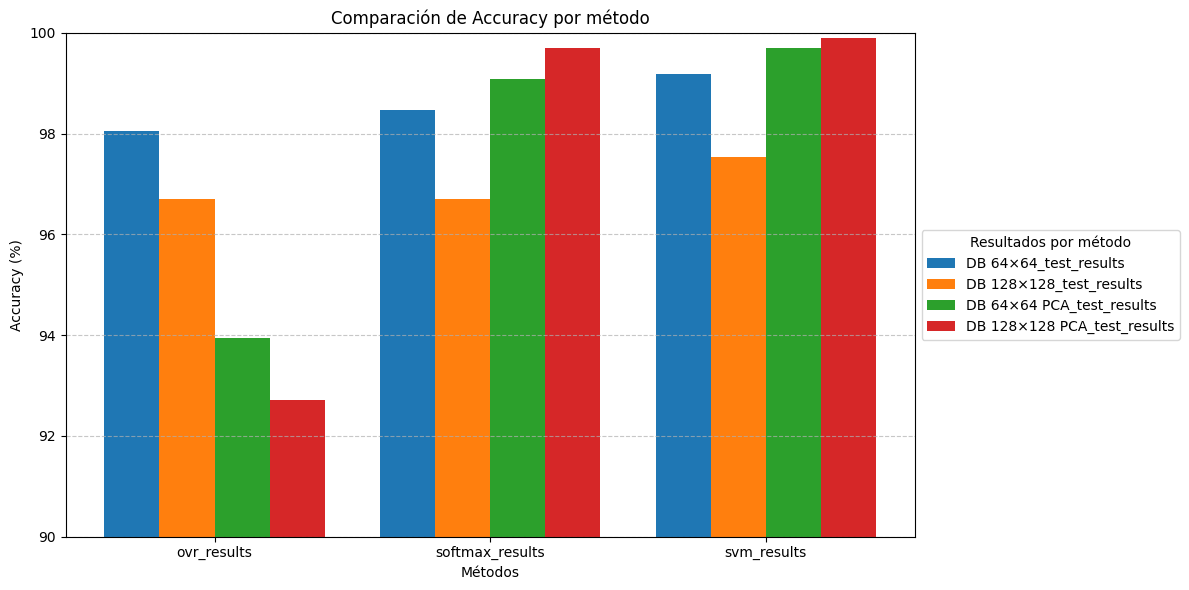

In [ ]:
all_accuracies = {}
for folder in DB_BASE_PATH:
    all_accuracies[folder] = []
    for file_name in file_names:
        file_path = os.path.join(folder, file_name)
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                all_accuracies[folder].append(data['accuracy'] * 100)  # Convertir a porcentaje
        except FileNotFoundError:
            print(f"Archivo no encontrado: {file_path}")
            all_accuracies[folder].append(None)  # Si falta el archivo, agregar un marcador vacío
        except KeyError:
            print(f"El archivo {file_path} no contiene la clave 'accuracy'.")
            all_accuracies[folder].append(None)

datasets = [os.path.basename(folder.strip('/')) for folder in all_accuracies.keys()]  # Extraer nombres limpios de las carpetas
file_labels = [os.path.splitext(name)[0] for name in file_names]
x = np.arange(len(datasets)) 
width = 0.2 

plt.figure(figsize=(12, 6))
for i, label in enumerate(file_labels):
    accuracies = [all_accuracies[folder][i] for folder in DB_BASE_PATH]
    plt.bar(x + i * width, accuracies, width, label=label)

plt.xlabel('Métodos')
plt.ylabel('Accuracy (%)')
plt.title('Comparación de Accuracy por método')
plt.xticks(x + width * (len(file_labels) - 1) / 2, datasets)
plt.legend(title="Resultados por método", loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(90, 100)
plt.show()